In [2]:
import numpy as np 
import pandas as pd 
import os
import shutil
import matplotlib.pyplot as plt 
from glob import glob
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import random

from sklearn.model_selection import train_test_split
import tensorflow as tf


# organizing the data

In [3]:
os.makedirs('No_label', exist_ok=True)
os.makedirs('Yes_label', exist_ok=True)


In [4]:
No_folder='/kaggle/working/No_label'
Yes_folder='/kaggle/working/Yes_label'

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    folder_name = os.path.basename(dirname)  # Get the last part of the directory name
    for filename in filenames:
        source_path = os.path.join(dirname, filename)  # Full source path
        
        if folder_name == 'no':
            destination_path = os.path.join(No_folder, filename)
        else:
            destination_path = os.path.join(Yes_folder, filename)

        shutil.copy(source_path, destination_path)

# Processing the data

In [6]:
num_no_files = len([f for f in os.listdir(No_folder) if os.path.isfile(os.path.join(No_folder, f))])
num_yes_files = len([f for f in os.listdir(Yes_folder) if os.path.isfile(os.path.join(Yes_folder, f))])

print(f"Number of files in 'No_label': {num_no_files}")
print(f"Number of files in 'Yes_label': {num_yes_files}")

Number of files in 'No_label': 98
Number of files in 'Yes_label': 155


**Ploting the data**

In [7]:
no_images=glob("/kaggle/working/No_label/*")
yes_images=glob("/kaggle/working/Yes_label/*")

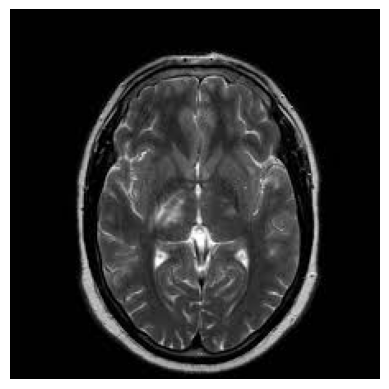

In [8]:
img = cv2.imread(no_images[0]) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.axis("off") 
plt.show()

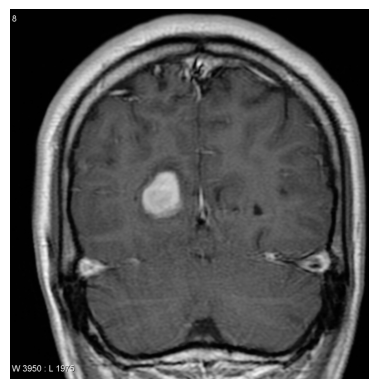

In [9]:
img = cv2.imread(yes_images[0]) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.axis("off") 
plt.show()

In [10]:

def image_aug(image_path, saving_path, num_augmented=30):

    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading {image_path}")
        return
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (90, 90))  # Resize to 90x90
    
    
    for i in range(num_augmented):
        augmented_img = img.copy()
        
        # Apply a random rotation (-30° to 30°)
        angle = random.uniform(-30, 30)
        M = cv2.getRotationMatrix2D((45, 45), angle, 1)  # Rotate around center (90/2, 90/2)
        augmented_img = cv2.warpAffine(augmented_img, M, (90, 90))

        # Apply random blur
        if random.random() > 0.5:
            ksize = random.choice([3, 5])  # Random kernel size
            augmented_img = cv2.GaussianBlur(augmented_img, (ksize, ksize), 0)

        # Apply random contrast adjustment
        if random.random() > 0.5:
            alpha = random.uniform(0.8, 1.2)  # Contrast control (0.8 - 1.2)
            beta = random.randint(-10, 10)  # Brightness control (-10 to 10)
            augmented_img = cv2.convertScaleAbs(augmented_img, alpha=alpha, beta=beta)

        # Save the augmented image
        filename = os.path.basename(image_path).split('.')[0]  # Extract filename without extension
        save_path = os.path.join(saving_path, f"{filename}_aug_{i}.jpg")
        cv2.imwrite(save_path, augmented_img)

    print(f"Generated {num_augmented} augmented images for {image_path}")



In [11]:
yes_images=glob("/kaggle/working/Yes_label/*")
for img in yes_images:
    image_aug(img
          , "/kaggle/working/Yes_label/", num_augmented=60)

Generated 60 augmented images for /kaggle/working/Yes_label/Y51.jpg
Generated 60 augmented images for /kaggle/working/Yes_label/Y182.JPG
Generated 60 augmented images for /kaggle/working/Yes_label/Y85.JPG
Generated 60 augmented images for /kaggle/working/Yes_label/Y30.jpg
Generated 60 augmented images for /kaggle/working/Yes_label/Y113.JPG
Generated 60 augmented images for /kaggle/working/Yes_label/Y9.jpg
Generated 60 augmented images for /kaggle/working/Yes_label/Y41.jpg
Generated 60 augmented images for /kaggle/working/Yes_label/Y69.jpg
Generated 60 augmented images for /kaggle/working/Yes_label/Y54.jpg
Generated 60 augmented images for /kaggle/working/Yes_label/Y259.JPG
Generated 60 augmented images for /kaggle/working/Yes_label/Y100.JPG
Generated 60 augmented images for /kaggle/working/Yes_label/Y49.JPG
Generated 60 augmented images for /kaggle/working/Yes_label/Y156.JPG
Generated 60 augmented images for /kaggle/working/Yes_label/Y36.JPG
Generated 60 augmented images for /kaggle/wo

In [12]:
no_images=glob("/kaggle/working/No_label/*")
for img in no_images:
    image_aug(img
          , "/kaggle/working/No_label/", num_augmented=120)

Generated 120 augmented images for /kaggle/working/No_label/35 no.jpg
Generated 120 augmented images for /kaggle/working/No_label/20 no.jpg
Generated 120 augmented images for /kaggle/working/No_label/N3.jpg
Generated 120 augmented images for /kaggle/working/No_label/no 923.jpg
Generated 120 augmented images for /kaggle/working/No_label/27 no.jpg
Generated 120 augmented images for /kaggle/working/No_label/30 no.jpg
Generated 120 augmented images for /kaggle/working/No_label/40 no.jpg
Generated 120 augmented images for /kaggle/working/No_label/29 no.jpg
Generated 120 augmented images for /kaggle/working/No_label/37 no.jpg
Generated 120 augmented images for /kaggle/working/No_label/32 no.jpg
Generated 120 augmented images for /kaggle/working/No_label/No18.jpg
Generated 120 augmented images for /kaggle/working/No_label/14 no.jpg
Generated 120 augmented images for /kaggle/working/No_label/no 100.jpg
Generated 120 augmented images for /kaggle/working/No_label/N20.JPG
Generated 120 augmented 

In [13]:
num_no_files = len([f for f in os.listdir(No_folder) if os.path.isfile(os.path.join(No_folder, f))])
num_yes_files = len([f for f in os.listdir(Yes_folder) if os.path.isfile(os.path.join(Yes_folder, f))])

print(f"Number of files in 'No_label': {num_no_files}")
print(f"Number of files in 'Yes_label': {num_yes_files}")

Number of files in 'No_label': 11858
Number of files in 'Yes_label': 9395


# splitting the data into training and testing data

In [14]:

no_folder = "/kaggle/working/No_label/"
yes_folder = "/kaggle/working/Yes_label/"

def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        if os.path.isfile(img_path) and img_name.endswith(('.jpg', '.png', '.jpeg')):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
            img = cv2.resize(img, (90, 90))  # Resize to 90x90
            images.append(img)
            labels.append(label)
    
    return images, labels


In [15]:
# Load images from both folders (0 for No tumor, 1 for Yes tumor)
no_images, no_labels = load_images_from_folder(no_folder, label=0)
yes_images, yes_labels = load_images_from_folder(yes_folder, label=1)

# Combine the images and labels from both folders
images = np.array(no_images + yes_images)
labels = np.array(no_labels + yes_labels)

# Normalize the images to be in the range [0, 1]
images = images / 255.0

# Reshape to (num_samples, 90, 90, 1) for CNN (grayscale images with 1 channel)
images = images.reshape(-1, 90, 90, 1)

# Split data into training and testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


# CNN Model

In [22]:
from tensorflow.keras.regularizers import l2

# CNN Model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(90, 90, 1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 88, 88, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 44, 44, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 42, 42, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,327,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,420,033 (5.42 MB)

 Trainable params: 1,420,033 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7077 - loss: 1.0353 - val_accuracy: 0.7219 - val_loss: 0.6393
Epoch 2/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7987 - loss: 0.5524 - val_accuracy: 0.9044 - val_loss: 0.4279
Epoch 3/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8913 - loss: 0.4431 - val_accuracy: 0.9592 - val_loss: 0.3364
Epoch 4/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9414 - loss: 0.3581 - val_accuracy: 0.9856 - val_loss: 0.2704
Epoch 5/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9605 - loss: 0.3094 - val_accuracy: 0.9901 - val_loss: 0.2526
Epoch 6/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9649 - loss: 0.2980 - val_accuracy: 0.9943 - val_loss: 0.2173
Epoch 7/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9654 - loss: 0.2771 - val_accuracy: 0.9927 - val_loss: 0.2198
Epoch 8/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9713 - loss: 0.2598 - val_accuracy: 

# Results

In [36]:
model.save('brain_tumor_detector.keras')

In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9908 - loss: 0.1968
Test Accuracy: 99.03%
Test Loss: 0.1968


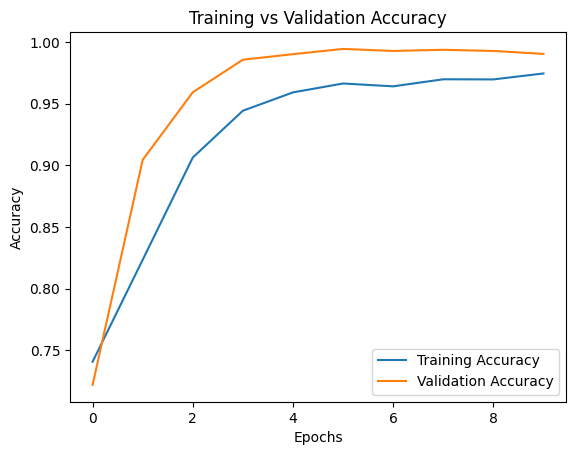

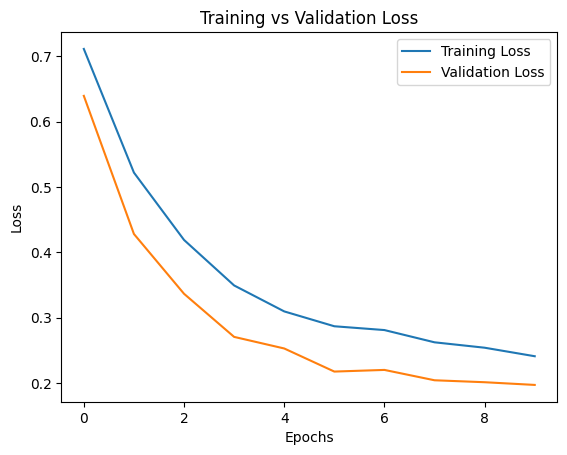

In [25]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Saving the model

In [58]:
img_path = '/kaggle/working/No_label/1 no.jpeg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (90, 90))  # Ensure it matches the input shape used during training
img = np.expand_dims(img, axis=-1)  # Add channel dimension if the model expects it
img = np.expand_dims(img, axis=0)  # Add batch dimension

In [59]:
prediction = model.predict(img)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.]]
